In [63]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [64]:
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [65]:
print(list(df.columns))

['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [67]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [68]:
print("number of data row:", df.shape[0] )

number of data row: 12684


In [69]:
print("number of data column:", df.shape[1] )

number of data column: 26


In [70]:
print("attribute (column name):", df.columns.values )

attribute (column name): ['destination' 'passanger' 'weather' 'temperature' 'time' 'coupon'
 'expiration' 'gender' 'age' 'maritalStatus' 'has_children' 'education'
 'occupation' 'income' 'car' 'Bar' 'CoffeeHouse' 'CarryAway'
 'RestaurantLessThan20' 'Restaurant20To50' 'toCoupon_GEQ5min'
 'toCoupon_GEQ15min' 'toCoupon_GEQ25min' 'direction_same' 'direction_opp'
 'Y']


In [71]:
Y_counts = df.groupby('Y').Y.count()
acp_counts = Y_counts[1]
rep_counts = Y_counts[0]
acp_percents = round(Y_counts[1]/df.shape[0]*100,3)
rep_percents = round(Y_counts[0]/df.shape[0]*100,3)

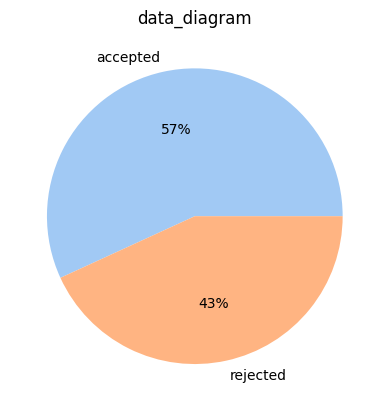

In [72]:
data_diagram = [acp_percents, rep_percents]
labels = ["accepted", "rejected"]

colors = sns.color_palette("pastel")[0:2]

plt.pie(data_diagram, labels = labels, colors = colors,autopct="%.0f%%")
plt.title("data_diagram")
plt.show()

In [73]:
duplicate_data = df[df.duplicated(keep="last")]
print(duplicate_data)

     destination passanger weather  temperature  time                 coupon  \
4191        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4235        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4279        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4323        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4408        Work     Alone   Sunny           80   7AM  Carry out & Take away   
...          ...       ...     ...          ...   ...                    ...   
7409        Home     Alone   Sunny           80   6PM                    Bar   
7410        Home   Partner   Sunny           30  10PM  Carry out & Take away   
7411        Work     Alone   Rainy           55   7AM        Restaurant(<20)   
7413        Work     Alone   Snowy           30   7AM      Restaurant(20-50)   
7414        Work     Alone   Sunny           80   7AM        Restaurant(<20)   

     expiration  gender age    maritalS

In [74]:
df = df.drop_duplicates()
print("number of row after dropping duplicates data:",df.shape[0])

number of row after dropping duplicates data: 12610


In [75]:
df.dropna(axis=1, thresh=df.shape[0]*0.8, inplace=True)
print('number of columns after dropping where have NA values:', df.shape[1])

number of columns after dropping where have NA values: 25


In [76]:
df.corr()

C:\Users\tranm\AppData\Local\Temp\ipykernel_14812\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.018599,NaN,-0.157089,-0.227165,0.097972,-0.097972,0.059393
has_children,-0.018599,1.000000,NaN,0.079434,-0.010773,-0.032353,0.032353,-0.045056
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.157089,0.079434,NaN,1.000000,0.321260,-0.302066,0.302066,-0.082693
toCoupon_GEQ25min,-0.227165,-0.010773,NaN,0.321260,1.000000,-0.189900,0.189900,-0.108139
direction_same,0.097972,-0.032353,NaN,-0.302066,-0.189900,1.000000,-1.000000,0.014932
direction_opp,-0.097972,0.032353,NaN,0.302066,0.189900,-1.000000,1.000000,-0.014932
Y,0.059393,-0.045056,NaN,-0.082693,-0.108139,0.014932,-0.014932,1.000000


In [77]:
df = df.drop(['direction_same','toCoupon_GEQ5min'],axis=1)
print('after dropping:',df.shape[1])

after dropping: 23


In [78]:
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]

print(cols_with_missing)

['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


In [79]:
for col in cols_with_missing:
    most_frequent_value = df[col].value_counts().index[0]
    df[col] = df[col].fillna(most_frequent_value)

In [80]:
def relasionally_analyze(col):
    rls = pd.DataFrame(sorted(list(df[col].unique())),columns = [col])
    rls['total counts'] = list(df.groupby(col).Y.count())
    rls['accepted counts'] = list(df[df.Y==1].groupby(col).Y.count())
    rls['rejected counts'] = list(df[df.Y==0].groupby(col).Y.count())
    rls = rls.sort_values(by = 'total counts', ascending = False)


    plt.barh(rls[col], rls['total counts'])
    plt.barh(rls[col], rls['accepted counts'])
    plt.legend(labels = ['total counts', 'accepted counts'])
    plt.xlabel('counts')
    plt.title(col)
    plt.show()

    return rls

In [81]:
feature = df.drop('Y',axis=1)

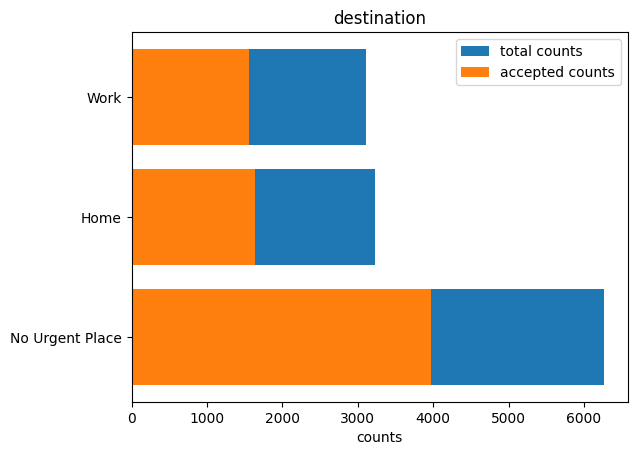

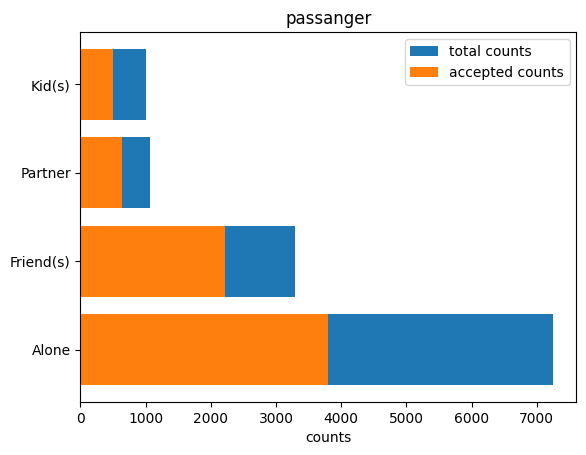

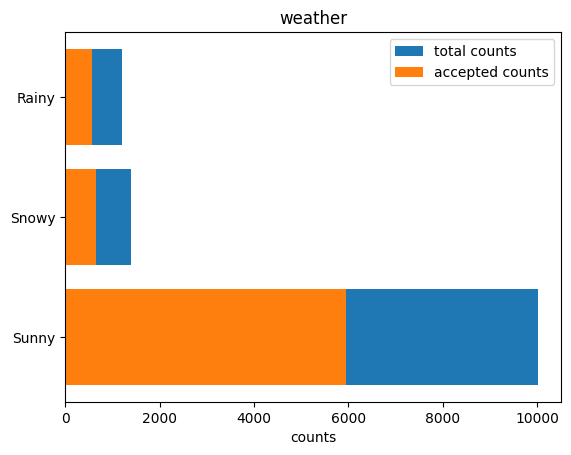

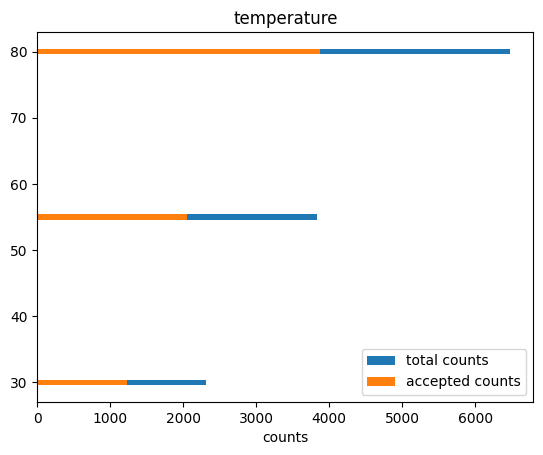

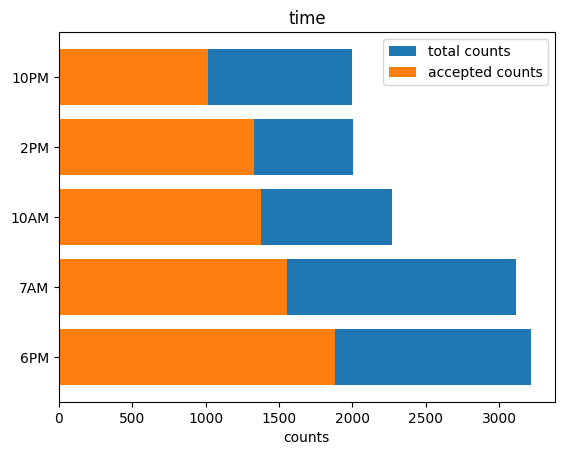

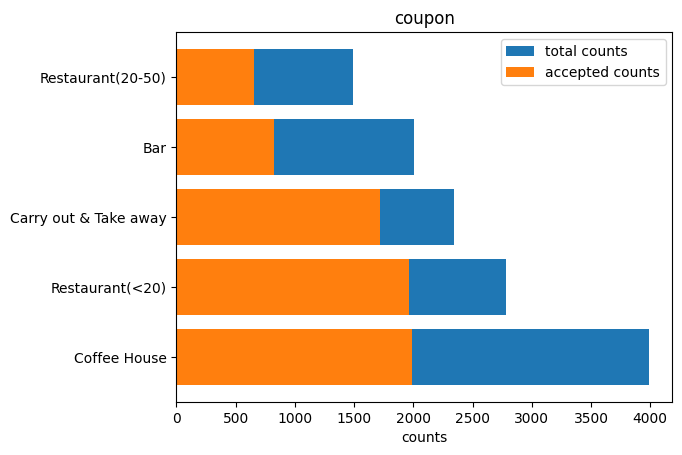

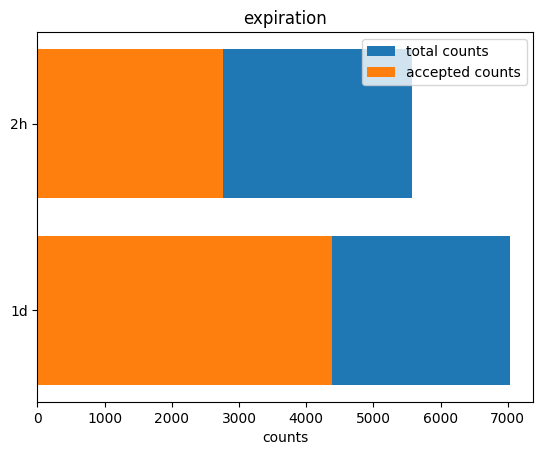

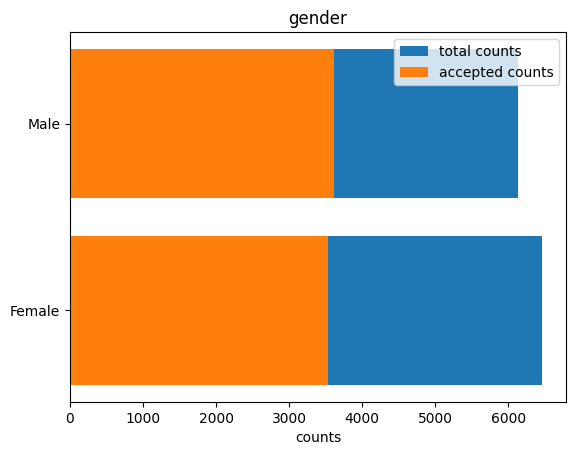

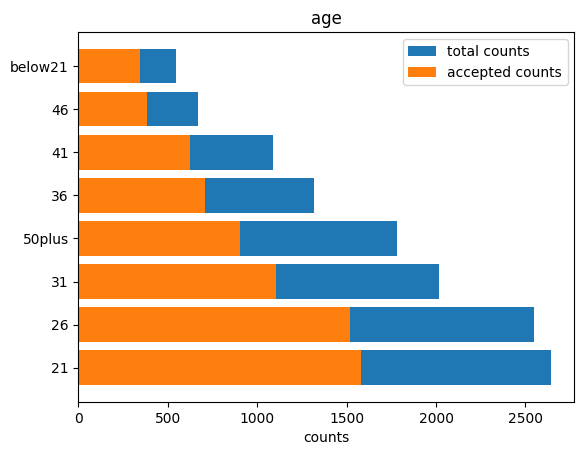

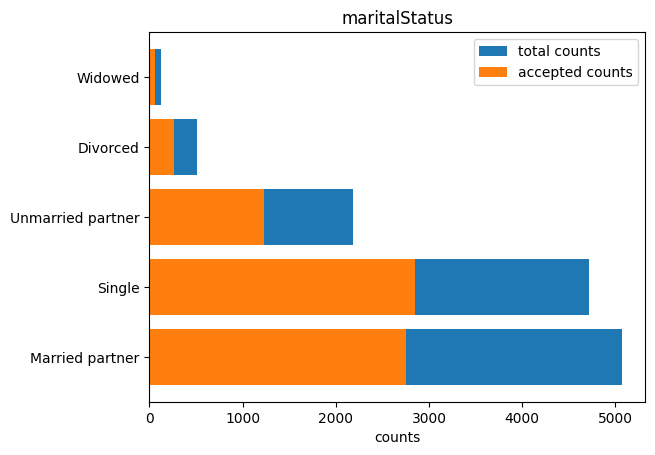

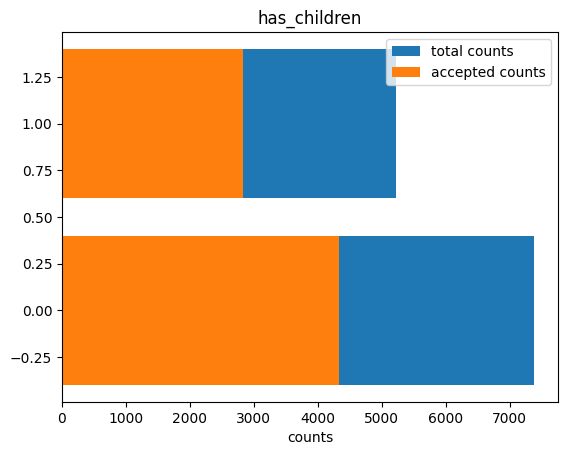

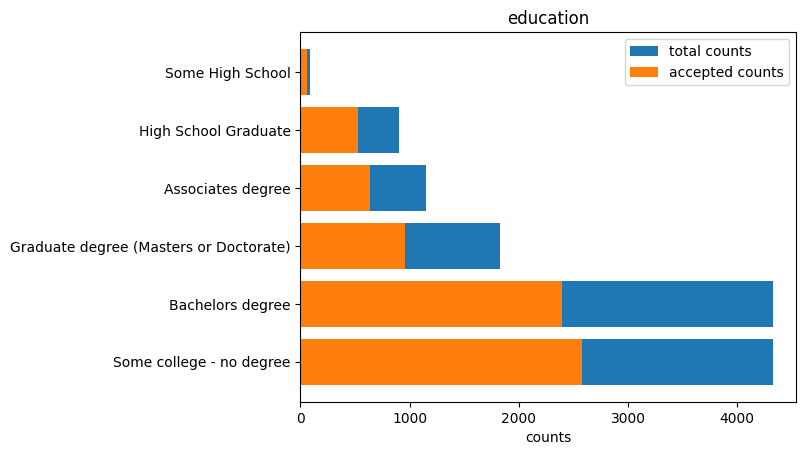

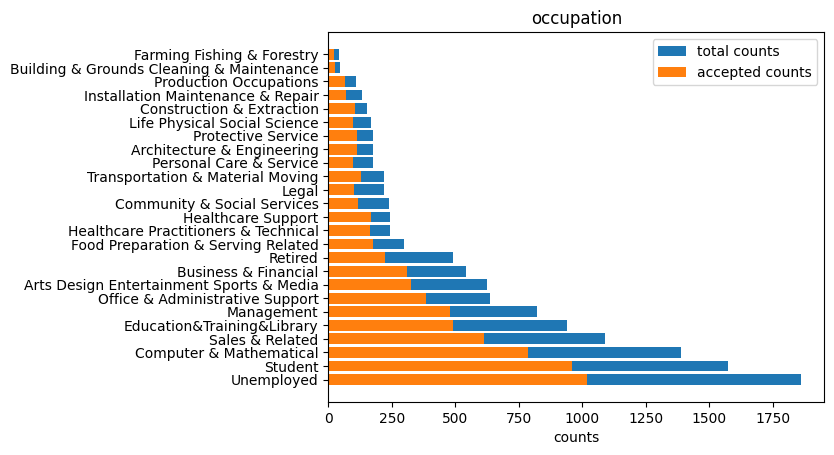

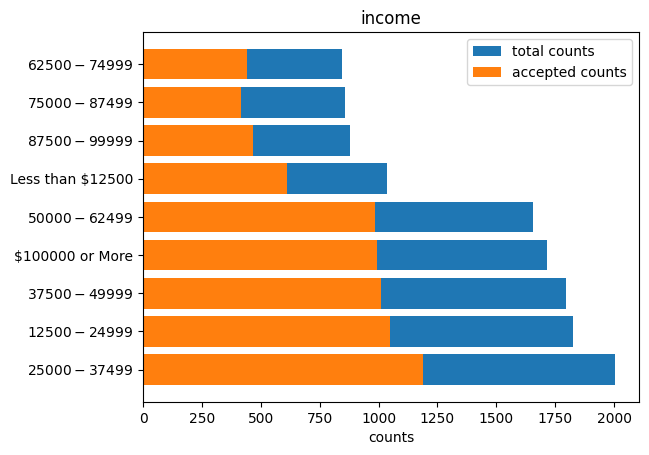

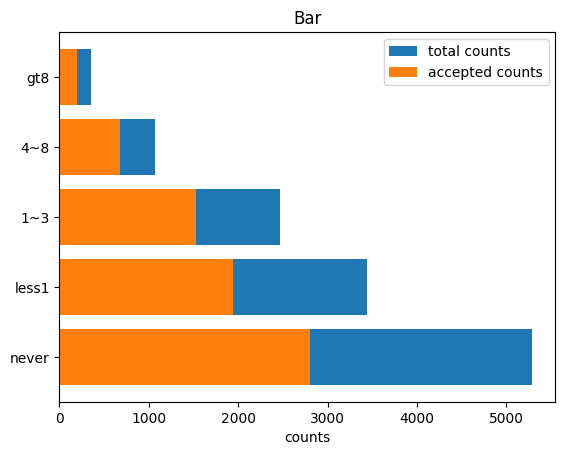

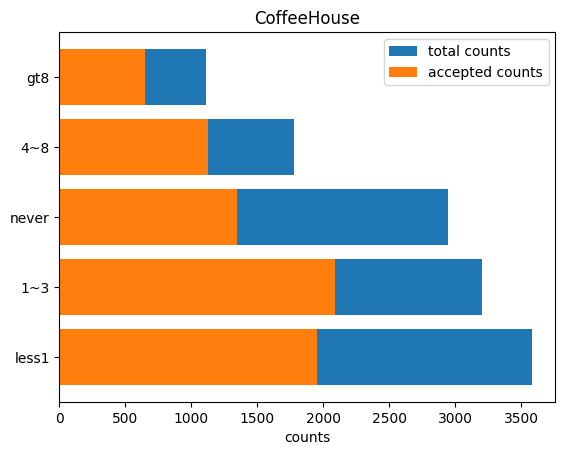

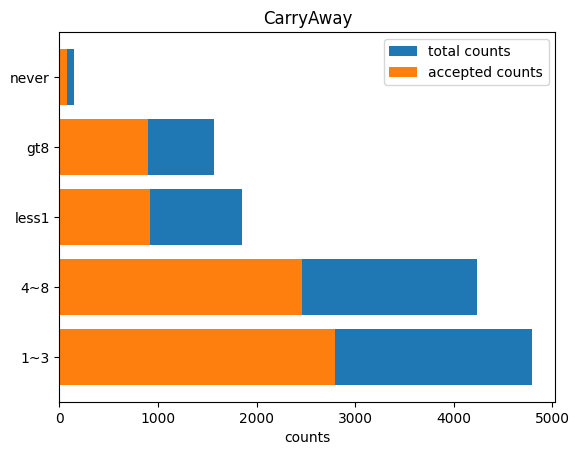

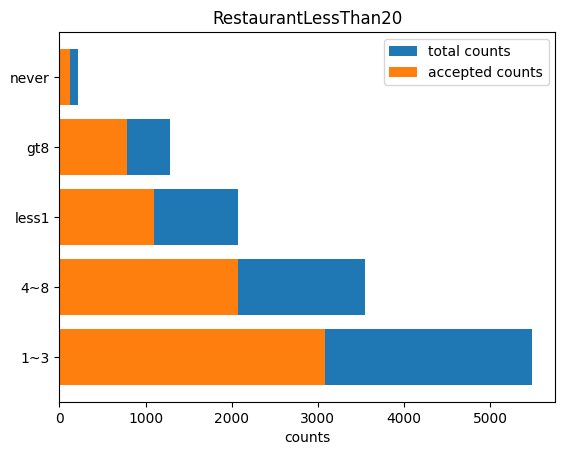

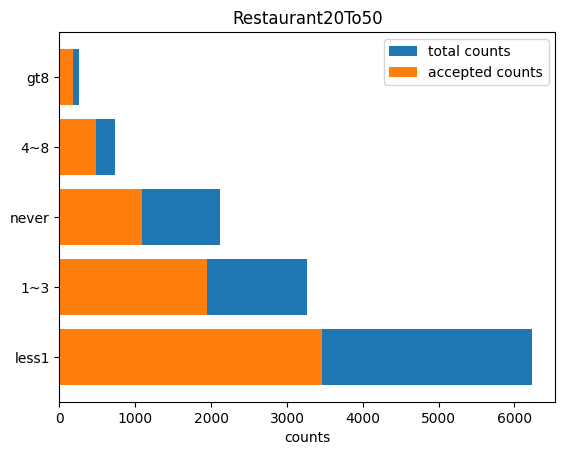

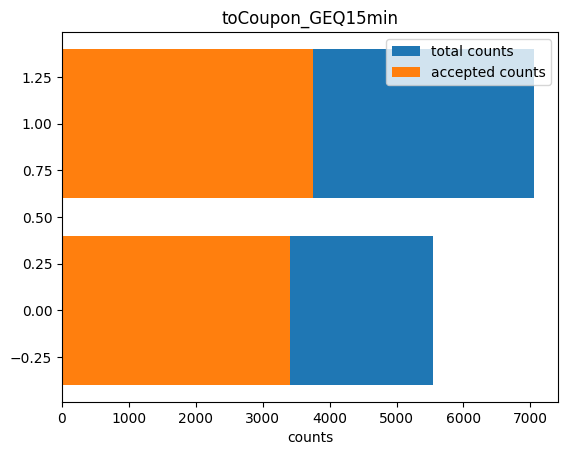

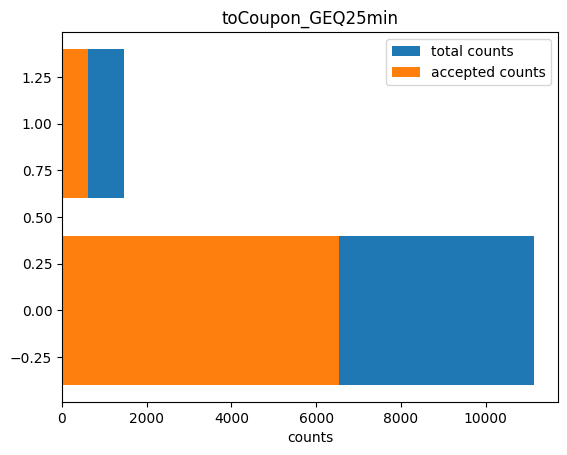

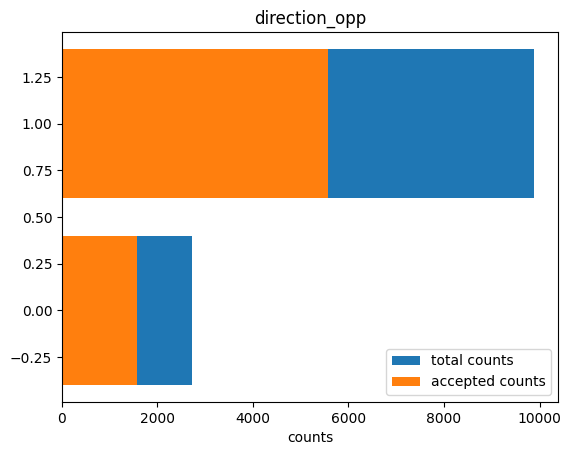

In [82]:
for col in list(feature):
    relasionally_analyze(col)

In [83]:
le = LabelEncoder()
for name in df.columns:
    if df[name].dtype == object:
        df[name] = le.fit_transform(df[name])
    else:
        pass

In [84]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_opp,Y
0,1,0,2,55,2,4,0,0,0,3,...,3,4,4,0,1,0,0,0,1,1
1,1,1,2,80,0,2,1,0,0,3,...,3,4,4,0,1,0,0,0,1,0
2,1,1,2,80,0,1,1,0,0,3,...,3,4,4,0,1,0,1,0,1,1
3,1,1,2,80,2,2,1,0,0,3,...,3,4,4,0,1,0,1,0,1,0
4,1,1,2,80,2,2,0,0,0,3,...,3,4,4,0,1,0,1,0,1,0


In [85]:
X = df.drop('Y',axis=1)
X.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_opp
0,1,0,2,55,2,4,0,0,0,3,...,24,3,4,4,0,1,0,0,0,1
1,1,1,2,80,0,2,1,0,0,3,...,24,3,4,4,0,1,0,0,0,1
2,1,1,2,80,0,1,1,0,0,3,...,24,3,4,4,0,1,0,1,0,1
3,1,1,2,80,2,2,1,0,0,3,...,24,3,4,4,0,1,0,1,0,1
4,1,1,2,80,2,2,0,0,0,3,...,24,3,4,4,0,1,0,1,0,1


In [86]:
y = df['Y']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Y, dtype: int64

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
print("train size", len(y_train))
print("test size", len(y_test))
df_test = pd.DataFrame({'Target': y_test})

df_test

train size 10088
test size 2522


,Target
8199,0
11463,0
1945,0
8040,0
9433,1
...,...
4908,1
3717,1
4122,0
2777,0


In [89]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [90]:
base_model = DecisionTreeClassifier(random_state=42)

In [91]:
bagging_model = BaggingClassifier(base_estimator=base_model, random_state=42)

In [92]:
bagging_model.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  random_state=42)

In [93]:
predictions = bagging_model.predict(X)

df_predictions = pd.DataFrame({'Prediction': predictions, 'Target': y})

df_predictions


,Prediction,Target
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
12679,1,1
12680,1,1
12681,0,0
12682,0,0


In [94]:
accuracy = 100 * (predictions == y).mean()
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 98.62
